Loading data...
Data loaded.
Training Teacher Model
Epoch: 20/200..  Training loss: 6794.13721..  Reg Proj: 0.00000..  Reg Latent: 0.85639..  Memory: 6785.57324..  Cost: 6794.13721.. 
Epoch: 40/200..  Training loss: 10600.24023..  Reg Proj: 0.00000..  Reg Latent: 0.75120..  Memory: 10592.72852..  Cost: 10600.24023.. 
Epoch: 60/200..  Training loss: 7579.91602..  Reg Proj: 0.00000..  Reg Latent: 0.11252..  Memory: 7578.79102..  Cost: 7579.91602.. 
Epoch: 80/200..  Training loss: 8543.61426..  Reg Proj: 0.00000..  Reg Latent: 0.19953..  Memory: 8541.61914..  Cost: 8543.61426.. 
Epoch: 100/200..  Training loss: 8802.12305..  Reg Proj: 0.00000..  Reg Latent: 6.10833..  Memory: 8741.04004..  Cost: 8802.12305.. 
Epoch: 120/200..  Training loss: 8114.32812..  Reg Proj: 0.00000..  Reg Latent: 0.34775..  Memory: 8110.85059..  Cost: 8114.32812.. 
Epoch: 140/200..  Training loss: 8897.88770..  Reg Proj: 0.00000..  Reg Latent: 0.07745..  Memory: 8897.11328..  Cost: 8897.88770.. 
Epoch: 160/200..  

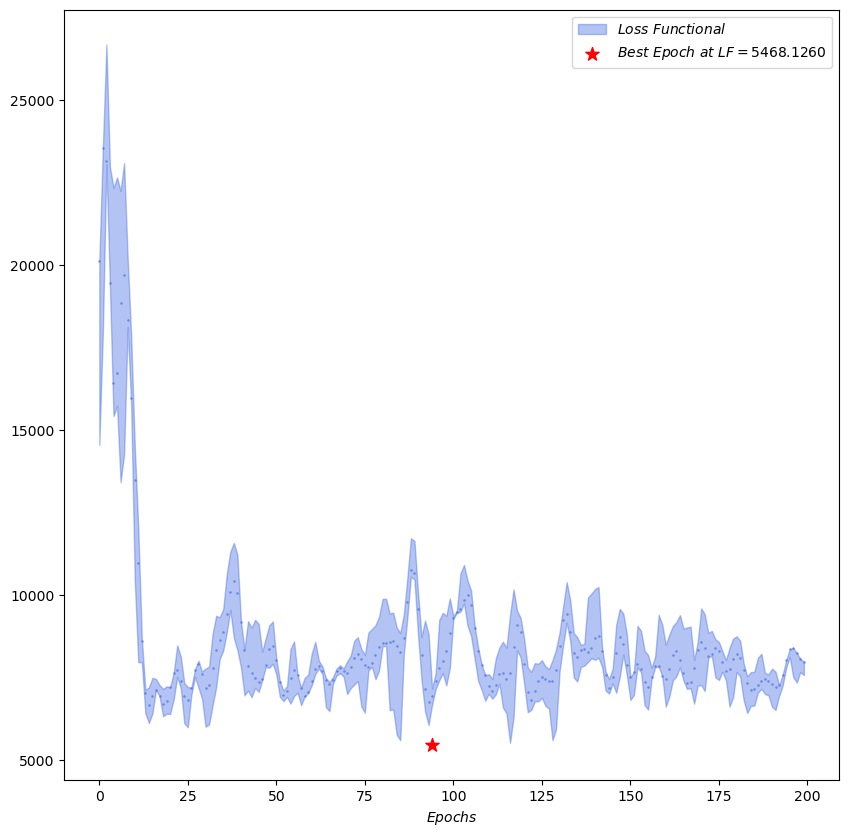

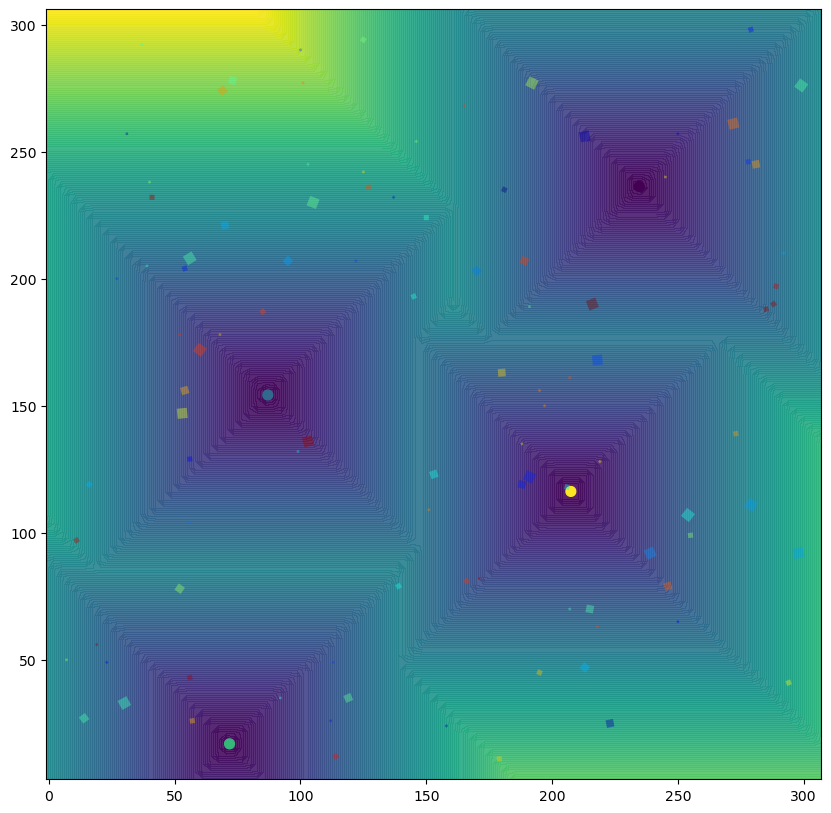

Processing...
flag is 5859
m is 4142
i is 10000


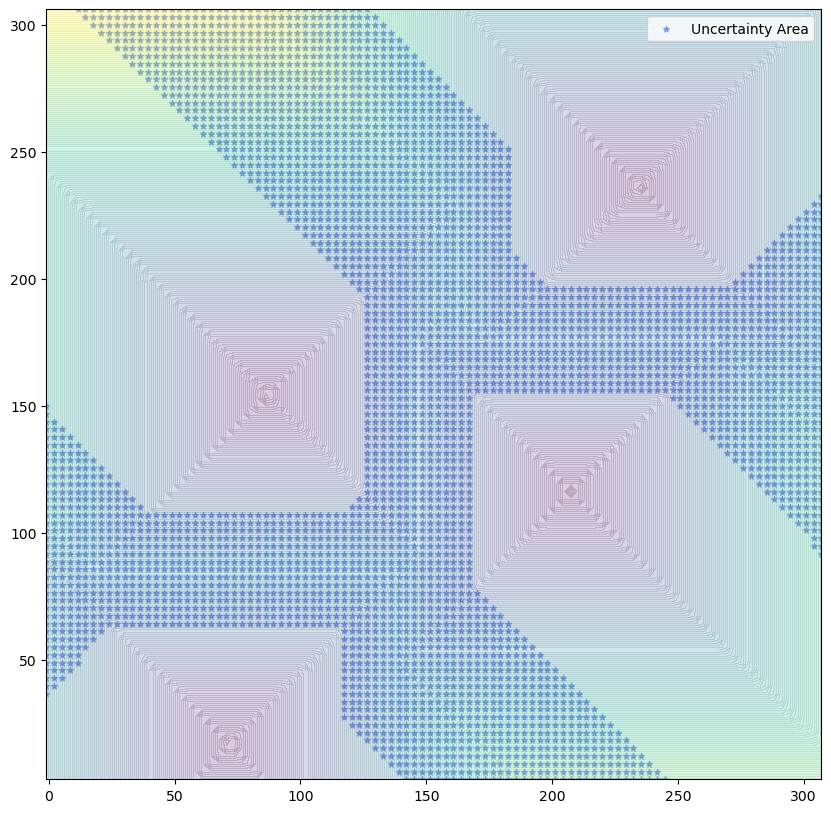

Labeled 0/4142 points.
Labeled 1000/4142 points.
Labeled 2000/4142 points.
Labeled 3000/4142 points.
Labeled 4000/4142 points.
Labeled all 4142/4142 points.


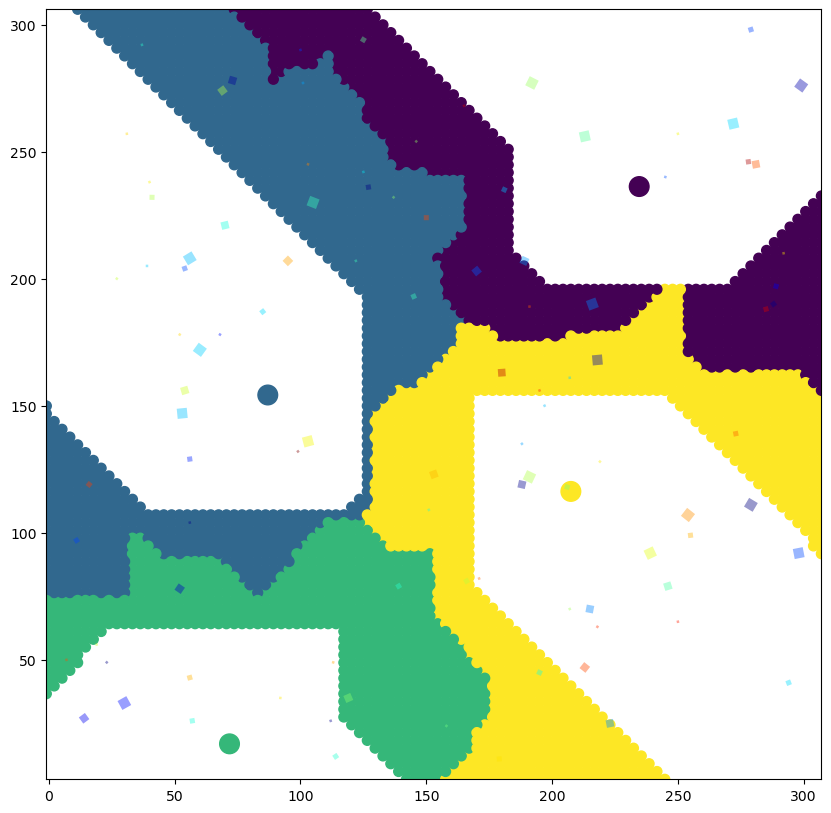

Training Student Model
Acc:  0.2846450989859971
Epoch:  0 Cost:  2210.740478515625
Acc:  0.8232737807822308
Epoch:  2000 Cost:  34.52541732788086
Acc:  0.957508450024143
Epoch:  4000 Cost:  17.919864654541016
Acc:  0.9616127474649928
Epoch:  6000 Cost:  13.735973358154297
Acc:  0.939159826170932
Epoch:  8000 Cost:  13.89305591583252
Acc:  0.9348140994688556
Epoch:  10000 Cost:  13.158382415771484
Acc:  0.9811685176243361
Epoch:  12000 Cost:  8.260942459106445
Acc:  0.9705456301303718
Epoch:  14000 Cost:  8.165206909179688
Acc:  0.9734427812650893
Epoch:  16000 Cost:  7.333347797393799
Acc:  0.9756156446161275
Epoch:  18000 Cost:  6.987368106842041
Acc:  0.9500241429261227
Epoch:  20000 Cost:  9.601189613342285
Acc:  0.9666827619507484
Epoch:  22000 Cost:  7.455240726470947
Acc:  0.9700627716079189
Epoch:  24000 Cost:  6.966046333312988
Acc:  0.9534041525832931
Epoch:  26000 Cost:  9.56002140045166
Acc:  0.9925156929019797
Epoch:  28000 Cost:  4.744959354400635
Saved student config to m

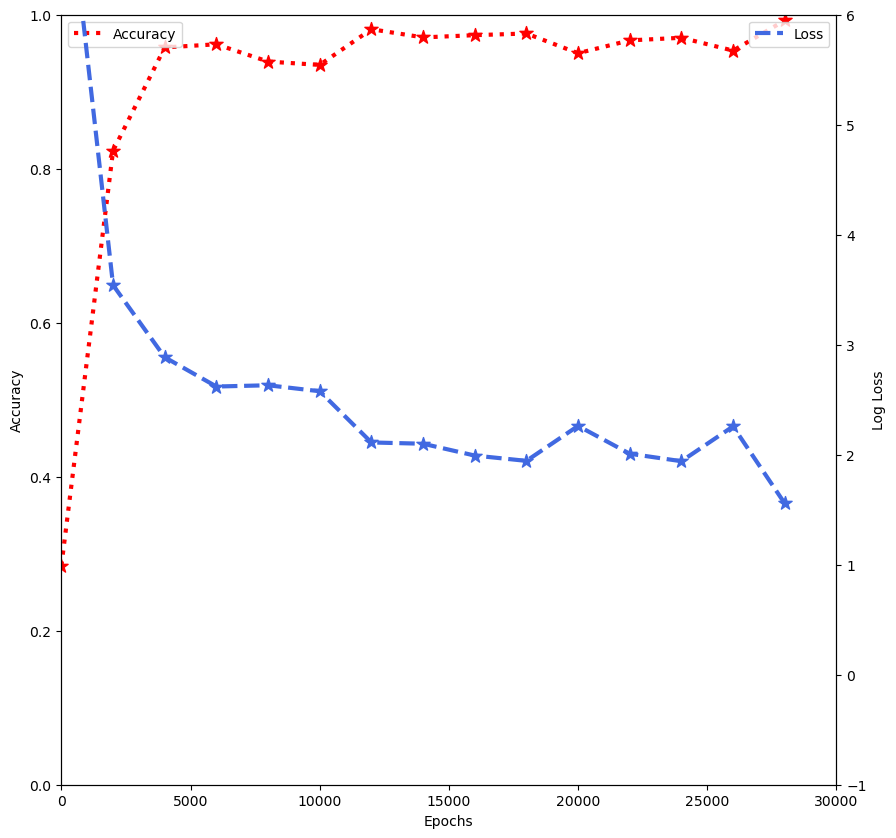

In [1]:
import torch
from src.quadtree import QuadTree
from src.utils.data import loadData

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data, _ = loadData(100)

learning_rate = 1e-2
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 200,
    "times": 10,
    "alpha": 5,
    "beta": 10
}
un_args = {
    "N": 100,
    "M": 10000 - 1,
    "epsilon": 0.15
}
student_args = {
    "optimizer_lr": 1e-3,
    "epochs": 30000,
}

quadtree = QuadTree(40, data, teacher_args, un_args, student_args)
quadtree.create_tree(save_path_prefix="models/squares/100/class", plot=True)

In [2]:
# Print a student prediction both using the student model from training
# and the student model loaded from config. The two outputs should be equal.
query = torch.tensor([[4., 2.], [2., 0.]])

pred_trained = quadtree.root.student(query)
print(pred_trained)

# Recreate the student mddel from config.
node = QuadTree.Node(quadtree.root.data, "", quadtree)
node.create_student_from_config("models/squares/100/class0_student_config.pt")
pred_config = node.student(query)
print(pred_config)

print("Predictions are " + "equal." if torch.equal(pred_trained, pred_config) else "NOT equal.")

tensor([[-66.1116, -38.0261,  90.1937,  11.9423],
        [-67.7020, -44.5375,  93.9272,  11.6594]], grad_fn=<AddmmBackward0>)
tensor([[-66.1116, -38.0261,  90.1937,  11.9423],
        [-67.7020, -44.5375,  93.9272,  11.6594]], grad_fn=<AddmmBackward0>)
Predictions are equal.


In [3]:
query = torch.tensor([[4., 2.], [2., 0.], [0, 30], [45, 89], [12, 91]])

for query_point in query:
    pred = quadtree.query(query_point)
    brute_force = quadtree.root.query(query_point)
    print(pred)
    print(brute_force)

[191.         189.           1.           1.36627351]
[14.         27.          3.          0.63457281]
[191.         189.           1.           1.36627351]
[14.         27.          3.          0.63457281]
[170.         203.           3.           0.68027295]
[14.         27.          3.          0.63457281]
[170.         203.           3.           0.68027295]
[52.         78.          3.          0.96914599]
[151.         109.           1.           0.53729559]
[11.         97.          2.          0.56883575]


In [5]:
import numpy as np
query = torch.tensor([[4., 2.], [2., 0.], [0, 30], [45, 89], [12, 91]])

# Build tree from config
quadtree2 = QuadTree(40, data, teacher_args, un_args, student_args)
quadtree2.root.create_student_from_config("models/squares/100/class0_student_config.pt")
teacher_results = np.load("models/squares/100/class0_teacher_training_results.npy", allow_pickle=True)
quadtree2.root.best_z = teacher_results.item()["best_z"]
quadtree2.root.divide()

for query_point in query:
    pred = quadtree2.query(query_point)
    brute_force = quadtree2.root.query(query_point)
    print(pred)
    print(brute_force)

[191.         189.           1.           1.36627351]
[14.         27.          3.          0.63457281]
[191.         189.           1.           1.36627351]
[14.         27.          3.          0.63457281]
[170.         203.           3.           0.68027295]
[14.         27.          3.          0.63457281]
[170.         203.           3.           0.68027295]
[52.         78.          3.          0.96914599]
[151.         109.           1.           0.53729559]
[11.         97.          2.          0.56883575]
